# Midterm project

In [2]:
import pandas as pd
import numpy as np
rnd_seed = 5

## Data exploration, cleaning and prep 

In [3]:
full_df = pd.read_csv('StudentsPerformance.csv')
full_df.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
full_df.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [5]:
full_df.dtypes

STUDENT ID                                                           object
Student Age                                                           int64
Sex                                                                   int64
Graduated high-school type                                            int64
Scholarship type                                                      int64
Additional work                                                       int64
Regular artistic or sports activity                                   int64
Do you have a partner                                                 int64
Total salary if available                                             int64
Transportation to the university                                      int64
Accommodation type in Cyprus                                          int64
Mother’s education                                                    int64
Father’s education                                                    int64
Number of si

In [6]:
# leaving only students of course 1
full_df= full_df[full_df['COURSE ID']!=1]

# delete unneeded data
del full_df['COURSE ID']
del full_df['GRADE']
del full_df['Expected Cumulative grade point average in the graduation (/4.00)']

# rename columns

renamedict = {
    'STUDENT ID':'student_id',
    'Student Age': 'age' ,
    'Sex': 'sex' ,
    'Graduated high-school type': 'hs_type' ,
    'Scholarship type': 'scholarship_type' ,
    'Additional work': 'extra_work' ,
    'Regular artistic or sports activity': 'activities' ,
    'Do you have a partner': 'partner' ,
    'Total salary if available': 'salary' ,
    'Transportation to the university': 'transportation' ,
    'Accommodation type in Cyprus': 'accommodation' ,
    'Mother’s education': 'mom_education' ,
    'Father’s education': 'dad_education' ,
    'Number of sisters/brothers': 'siblings' ,
    'Parental status': 'parental_status' ,
    'Mother’s occupation': 'mom_occupation' ,
    'Father’s occupation': 'dad_occupation' ,
    'Weekly study hours': 'study_per_week' ,
    'Reading frequency': 'non_science_reading' ,
    'Reading frequency.1': 'science_reading' ,
    'Attendance to the seminars/conferences related to the department': 'conf_attendance' ,
    'Impact of your projects/activities on your success': 'activity_impact' ,
    'Attendance to classes': 'class_attendance' ,
    'Preparation to midterm exams 1': 'midterm_prep_company' ,
    'Preparation to midterm exams 2': 'midterm_prep_timing' ,
    'Taking notes in classes': 'note_taking' ,
    'Listening in classes': 'listening_in_class' ,
    'Discussion improves my interest and success in the course': 'discussion_effect_on_interest' ,
    'Flip-classroom': 'flip_classroom' ,
    'Course ID':'course_id',
    'Cumulative grade point average in the last semester (/4.00)': 'last_sem_grade'
}

full_df.rename(columns=renamedict, inplace = True)
full_df.set_index('student_id', inplace = True)

In [7]:
# Do you have a gpa equal or greater than 3?
full_df.last_sem_grade = full_df.last_sem_grade.map(lambda x: (int)(x>3))

<Axes: xlabel='salary', ylabel='count'>

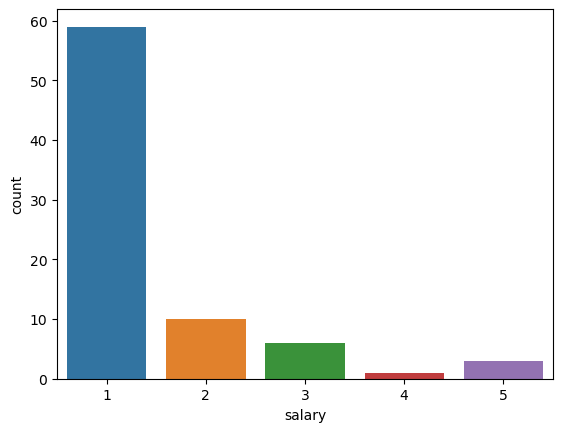

In [8]:
import seaborn as sns

sns.countplot(full_df,x='salary')

<Axes: xlabel='salary', ylabel='count'>

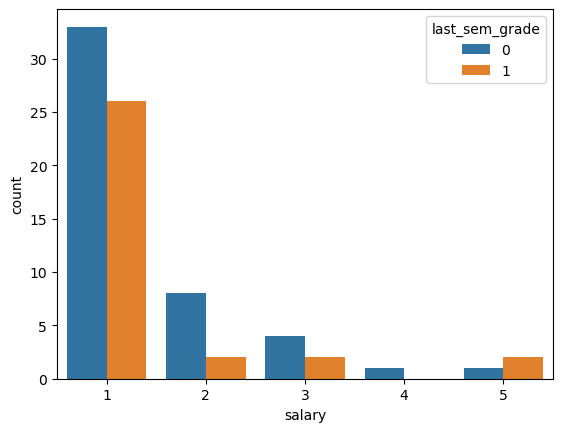

In [9]:
sns.countplot(data=full_df, x='salary', hue='last_sem_grade')

Salary seems to play a role here but more in some salary categories than others.

In [10]:
for column in full_df.columns:
    print((full_df[column].value_counts(normalize=True)),"\n-----------------------\n")

age
1    0.556962
2    0.405063
3    0.037975
Name: proportion, dtype: float64 
-----------------------

sex
1    0.518987
2    0.481013
Name: proportion, dtype: float64 
-----------------------

hs_type
2    0.721519
1    0.177215
3    0.101266
Name: proportion, dtype: float64 
-----------------------

scholarship_type
4    0.405063
3    0.354430
5    0.202532
2    0.025316
1    0.012658
Name: proportion, dtype: float64 
-----------------------

extra_work
2    0.632911
1    0.367089
Name: proportion, dtype: float64 
-----------------------

activities
1    0.518987
2    0.481013
Name: proportion, dtype: float64 
-----------------------

partner
2    0.607595
1    0.392405
Name: proportion, dtype: float64 
-----------------------

salary
1    0.746835
2    0.126582
3    0.075949
5    0.037975
4    0.012658
Name: proportion, dtype: float64 
-----------------------

transportation
1    0.632911
2    0.227848
4    0.126582
3    0.012658
Name: proportion, dtype: float64 
-----------------

Our data isn't balanced.



In [11]:
# Change mapping then types

target_mapping={
    1: 0,
    2: 25,
    3: 50,
    4: 75,
    5: 100
}

full_df['scholarship_type'] = full_df['scholarship_type'].map(lambda x: target_mapping[x])

target_mapping={
    1:1,
    2:0
}
full_df.sex = full_df.sex.map(target_mapping)
full_df['extra_work'] = full_df['extra_work'].map(target_mapping)
full_df['activities'] = full_df['activities'].map(target_mapping)
full_df['partner'] = full_df['partner'].map(target_mapping)
full_df['conf_attendance'] = full_df['conf_attendance'].map(target_mapping)


In [12]:
target_mapping={
    1:'private',
    2:'state',
    3:'other'
}
full_df.hs_type = full_df.hs_type.map(target_mapping)

target_mapping={
    1:'not useful',
    2:'useful',
    3:'not applicable'
}
full_df.flip_classroom = full_df.flip_classroom.map(target_mapping)

target_mapping={
    1:'never',
    2:'sometimes',
    3:'always'
}
full_df.discussion_effect_on_interest = full_df.discussion_effect_on_interest.map(target_mapping)
full_df.listening_in_class = full_df.listening_in_class.map(target_mapping)
full_df.note_taking = full_df.note_taking.map(target_mapping)

target_mapping={
    1:'always',
    2:'sometimes',
    3:'never'
}
full_df.class_attendance = full_df.class_attendance.map(target_mapping)

target_mapping={
    1:'bus',
    2:'car',
    3:'bicycle',
    4:'other'
}
full_df.transportation = full_df.transportation.map(target_mapping)

target_mapping={
    1:'none',
    2:'sometimes',
    3:'often'
}
full_df.non_science_reading = full_df.non_science_reading.map(target_mapping)
full_df.science_reading = full_df.science_reading.map(target_mapping)


target_mapping={
    1: 'primary',
    2: 'secondary',
    3: 'high',
    4: 'uni',
    5: 'MSc',
    6: 'PhD'
}
full_df.mom_education = full_df.mom_education.map(target_mapping)
full_df.dad_education = full_df.dad_education.map(target_mapping)

target_mapping={
    1:'rental',
    2:'dorm',
    3:'family',
    4:'other'
}
full_df.accommodation = full_df.accommodation.map(target_mapping)

target_mapping={
    1:'very_young',
    2:'young',
    3:'old'
}
full_df.age = full_df.age.map(target_mapping)

target_mapping={
    1:'alone',
    2:'friends',
    3:'NA'
}
full_df.midterm_prep_company = full_df.midterm_prep_company.map(target_mapping)

target_mapping={
    1:'late',
    2:'regularly',
    3:'never'
}
full_df.midterm_prep_timing = full_df.midterm_prep_timing.map(target_mapping)

target_mapping={
    1:'none',
    2:'five', #or less
    3:'ten',  #or less
    4:'twenty', #or less
    5:'more' #more than twenty
}
full_df.study_per_week = full_df.study_per_week.map(target_mapping)

target_mapping={
    1:'married',
    2:'divorced',
    3:'died'
}
full_df.parental_status = full_df.parental_status.map(target_mapping)

target_mapping={
    1:'positive',
    2:'negative',
    3:'neutral'
}
full_df.activity_impact = full_df.activity_impact.map(target_mapping)

target_mapping={
    1: 'retired',
    2: 'housewife',
    3: 'government_officer',
    4: 'private_sector',
    5: 'self-employment',
    6: 'other'
}
full_df.mom_occupation = full_df.mom_occupation.map(target_mapping)

target_mapping={
    1: 'retired',
    2: 'government_officer',
    3: 'private_sector',
    4: 'self-employment',
    5: 'other'
}
full_df.dad_occupation = full_df.dad_occupation.map(target_mapping)

target_mapping={
    1: 'very_low', # 135-200 USD
    2: 'low', # 201-270 USD
    3: 'medium', # 271-340 USD
    4: 'high', # 341-410 USD
    5: 'higher' # >410 USD
}
full_df.salary = full_df.salary.map(target_mapping)


target_mapping={
    1:'one',
    2:'two',
    3:'three',
    4:'four',
    5:'more_than_four'
}
full_df.siblings = full_df.siblings.map(target_mapping)


Let's check MI (mutual info)

In [13]:
from sklearn.metrics import normalized_mutual_info_score

mi_results = full_df[full_df.columns].apply(lambda x : normalized_mutual_info_score(x, full_df.last_sem_grade))

mi_results.sort_values(ascending=False)


last_sem_grade                   1.000000
mom_occupation                   0.082456
siblings                         0.053073
class_attendance                 0.051214
scholarship_type                 0.047000
study_per_week                   0.042065
non_science_reading              0.037702
salary                           0.034978
flip_classroom                   0.030958
dad_occupation                   0.030953
conf_attendance                  0.029586
sex                              0.025473
transportation                   0.022893
mom_education                    0.019922
midterm_prep_timing              0.019578
parental_status                  0.019515
science_reading                  0.017500
dad_education                    0.016645
note_taking                      0.014236
accommodation                    0.014133
discussion_effect_on_interest    0.013807
activity_impact                  0.009631
age                              0.008135
extra_work                       0

<Axes: xlabel='last_sem_grade', ylabel='count'>

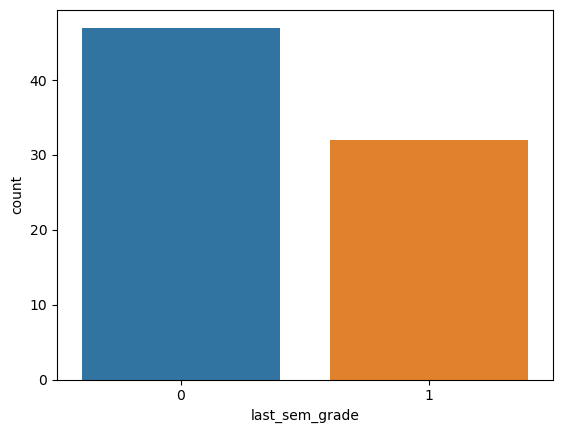

In [14]:
import seaborn as sns

sns.countplot(full_df,x='last_sem_grade')

## Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(full_df, test_size=0.2, random_state=rnd_seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=rnd_seed)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.last_sem_grade.values
y_val = df_val.last_sem_grade.values
y_test = df_test.last_sem_grade.values


del df_train['last_sem_grade']
del df_val['last_sem_grade']
del df_test['last_sem_grade']


In [16]:
from sklearn.feature_extraction import DictVectorizer


dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Logistic regression: training & parameter tuning

In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000, random_state=rnd_seed)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=5)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

roc_auc_score(y_val, log_model.predict(X_val))
accuracy_score(y_val, log_model.predict(X_val))


0.5

In [19]:
from sklearn.linear_model import LogisticRegression

log_scores = dict()
for c in [0.1,0.5,0.6,0.8,0.01,0.9,1,5,10,100,50]:
    log_model = LogisticRegression(max_iter=10000, random_state=rnd_seed,C=c)
    log_model.fit(X_train, y_train)
    log_scores[c] = accuracy_score(y_val, log_model.predict(X_val))
log_scores

{0.1: 0.4375,
 0.5: 0.5,
 0.6: 0.5,
 0.8: 0.5,
 0.01: 0.4375,
 0.9: 0.5,
 1: 0.5,
 5: 0.4375,
 10: 0.5,
 100: 0.5,
 50: 0.5}

In [20]:
from sklearn.linear_model import LogisticRegression

log_scores = dict()
for c in [0.1,0.5,0.6,0.8,0.01,0.9,1,5,10,100,50]:
    log_model = LogisticRegression(max_iter=10000, random_state=rnd_seed,C=c)
    log_model.fit(X_train, y_train)
    log_scores[c] = roc_auc_score(y_val, log_model.predict(X_val))
log_scores

{0.1: 0.38333333333333336,
 0.5: 0.5,
 0.6: 0.5,
 0.8: 0.5,
 0.01: 0.35,
 0.9: 0.5,
 1: 0.5,
 5: 0.45000000000000007,
 10: 0.5333333333333333,
 100: 0.5333333333333333,
 50: 0.5333333333333333}

We're picking 10 for the C value.

In [21]:
log_model = LogisticRegression(max_iter=10000, random_state=rnd_seed,C=10)

log_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, random_state=5)

## Decision Tress: Training & Parameter Tuning

Now we make another model, decision trees!

In [22]:
from sklearn.tree import DecisionTreeClassifier # the model
from sklearn.feature_extraction import DictVectorizer 
from sklearn.tree import export_text # to see the learnt rules


dt = DecisionTreeClassifier(random_state=rnd_seed)
dt.fit(X_train, y_train)


print(export_text(dt, feature_names=dv.get_feature_names_out()))


|--- siblings=more_than_four <= 0.50
|   |--- non_science_reading=none <= 0.50
|   |   |--- conf_attendance <= 0.50
|   |   |   |--- class: 0
|   |   |--- conf_attendance >  0.50
|   |   |   |--- partner <= 0.50
|   |   |   |   |--- age=old <= 0.50
|   |   |   |   |   |--- dad_occupation=self-employment <= 0.50
|   |   |   |   |   |   |--- non_science_reading=often <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- non_science_reading=often >  0.50
|   |   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- dad_occupation=self-employment >  0.50
|   |   |   |   |   |   |--- hs_type=private <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- hs_type=private >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age=old >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

roc_auc_score(y_val,dt.predict(X_val))
accuracy_score(y_val, dt.predict(X_val))

0.4375

In [24]:
# Bad result, Let's do some parameter tuning...

# we start with max_depths
depth_score = []
for depth in np.arange(2,21,1):
    dt = DecisionTreeClassifier(random_state=rnd_seed, max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    depth_score.append((depth,auc))

depth_score

[(2, 0.44999999999999996),
 (3, 0.4833333333333333),
 (4, 0.5333333333333333),
 (5, 0.625),
 (6, 0.42500000000000004),
 (7, 0.24999999999999997),
 (8, 0.4833333333333333),
 (9, 0.4833333333333333),
 (10, 0.4833333333333333),
 (11, 0.4833333333333333),
 (12, 0.4833333333333333),
 (13, 0.4833333333333333),
 (14, 0.4833333333333333),
 (15, 0.4833333333333333),
 (16, 0.4833333333333333),
 (17, 0.4833333333333333),
 (18, 0.4833333333333333),
 (19, 0.4833333333333333),
 (20, 0.4833333333333333)]

`max_depth=5` is our best result yet. Let's take the [3-6] range for depth and tune our `min_samples_leaf` parameter

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

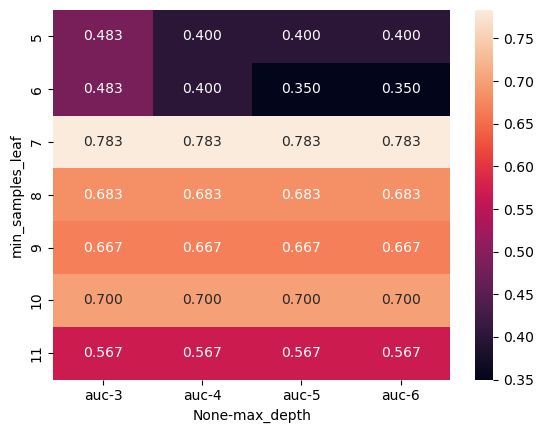

In [25]:
param_score = []

for depth in [3, 4, 5, 6]:
    for s in np.arange(5,12,1):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=rnd_seed)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        param_score.append((depth, s, auc))

        
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(param_score, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

It's decided! `max_depth = 5` and `min_samples_leaf = 7`

Let's make our model with its parameters tuned!

In [26]:

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=rnd_seed)

dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_pred)

print("Decision Tree:\nAccuracy:",accuracy_score(y_val, dt.predict(X_val)),"\nROC AUC:",auc,"\n-----------------------------")
print("\n\nLogistic Regression:\nAccuracy:",accuracy_score(y_val, log_model.predict(X_val)),"\nROC AUC:",roc_auc_score(y_val, log_model.predict(X_val)),"\n-----------------------------")

Decision Tree:
Accuracy: 0.8125 
ROC AUC: 0.7833333333333333 
-----------------------------


Logistic Regression:
Accuracy: 0.5 
ROC AUC: 0.5333333333333333 
-----------------------------


Our winner is clear, the decision tree model! (if I had more time I would've checked ensembles too)

Let's train it on the entire dataset.

## Training our final model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(full_df, test_size=0.2, random_state=rnd_seed)

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.last_sem_grade.values
y_test = df_test.last_sem_grade.values


del df_full_train['last_sem_grade']
del df_test['last_sem_grade']

dv = DictVectorizer(sparse=False)

train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=rnd_seed)
dt.fit(X_full_train, y_full_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=5)

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

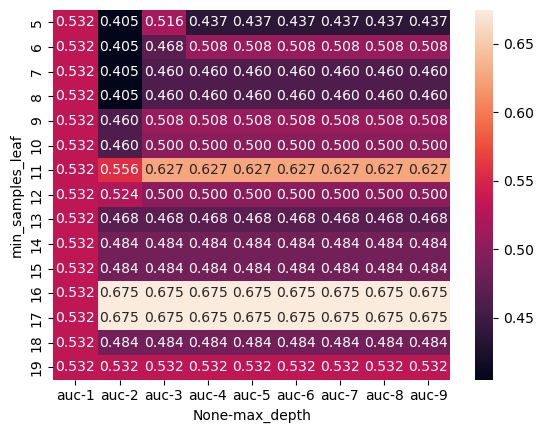

In [28]:
import seaborn as sns
param_score = []

for depth in np.arange(1,10):
    for s in np.arange(5,20,1):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=rnd_seed)
        dt.fit(X_full_train, y_full_train)

        y_pred = dt.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)
        
        param_score.append((depth, s, auc))

        
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(param_score, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [29]:
import pickle

output_file = 'tree.bin'

with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, dt), f_out)